In [1]:
# BN XP 12762 - CIFAR-100 CNN Classification Project

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Create directories to save model and plots
os.makedirs('models', exist_ok=True)
os.makedirs('plots', exist_ok=True)


In [2]:
# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
x_train shape: (50000, 32, 32, 3), y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 1)


In [3]:
# Normalize pixel values to range [0,1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [4]:
# One-hot encode labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

print(f"y_train shape after encoding: {y_train.shape}")
print(f"y_test shape after encoding: {y_test.shape}")


y_train shape after encoding: (50000, 100)
y_test shape after encoding: (10000, 100)


In [5]:
model = Sequential()

# Input convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
# Second convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropout
model.add(Dropout(0.25))

# Two 64-unit convolutional layers
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropout
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())
# Fully connected 512 units
model.add(Dense(512, activation='relu'))
# Dropout
model.add(Dropout(0.5))
# Output layer
model.add(Dense(100, activation='softmax'))

# Summary
model.summary()


c:\Users\Nishant\OneDrive\Desktop\nait mi\cifar100-cnn-project-\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 936,580 (3.57 MB)

 Trainable params: 936,580 (3.57 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=32
)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.0754 - loss: 4.0456 - val_accuracy: 0.1672 - val_loss: 3.5487
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.1682 - loss: 3.4838 - val_accuracy: 0.2271 - val_loss: 3.2117
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.2190 - loss: 3.2008 - val_accuracy: 0.2738 - val_loss: 2.9471
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.2565 - loss: 3.0099 - val_accuracy: 0.3106 - val_loss: 2.7888
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.2848 - loss: 2.8647 - val_accuracy: 0.3313 - val_loss: 2.6859
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.3049 - loss: 2.7617 - val_accuracy: 0.3471 - val_loss: 2.6253
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.3205 - loss: 2.6823 - val_accuracy: 0.3559 - val_loss: 2.5458
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4367 - loss: 2.2903
Test Loss: 2.2903, Test Accuracy: 43.67%


In [9]:
# Save model
model.save('models/cifar100_cnn_model.h5')
print("Model saved to 'models/cifar100_cnn_model.h5'")


Model saved to 'models/cifar100_cnn_model.h5'


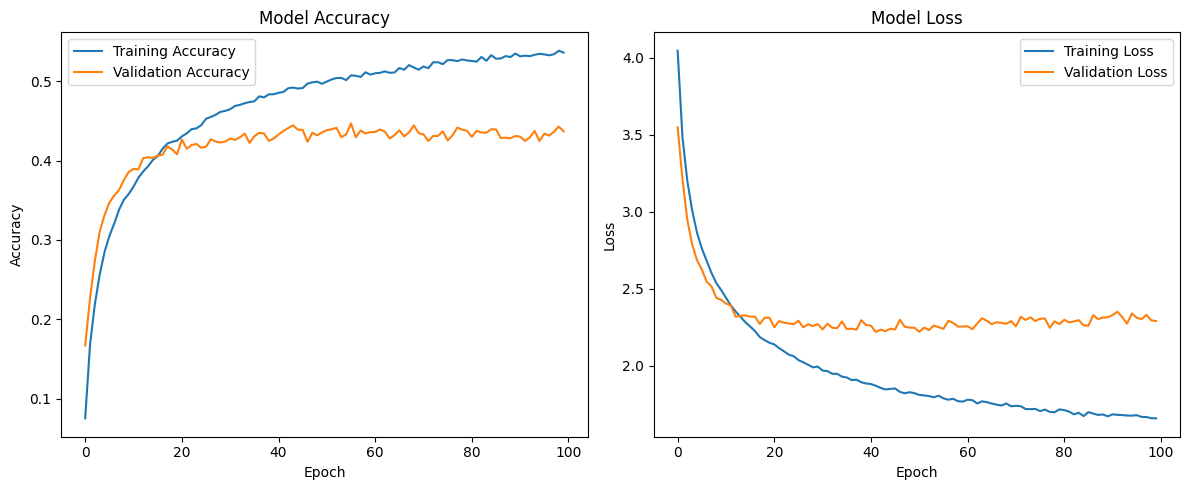

In [10]:
# Plot Accuracy and Loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('plots/training_history.png', dpi=300)
plt.show()
